In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from PIL import Image
import io

# Load data.npy
data = np.load('data.npy', allow_pickle=True)[()]
# List keys of dataset
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'illum1', 'illum2', 'x', 'y', 'z'])

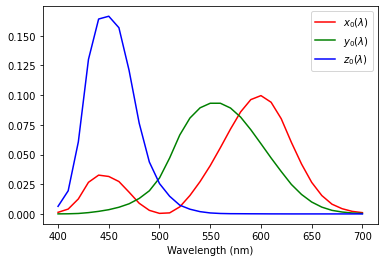

In [2]:
# print(data["illum1"])
lam = np.linspace(400,700,num=31)
plt.figure()
plt.plot(lam,np.transpose(data["x"]),color='red')
plt.plot(lam,np.transpose(data["y"]),color='green')
plt.plot(lam,np.transpose(data["z"]),color='blue')
plt.xlabel('Wavelength (nm)')
plt.legend(['$x_0(\lambda)$', '$y_0(\lambda)$', '$z_0(\lambda)$'])

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("xyz.tif")
png1.close()

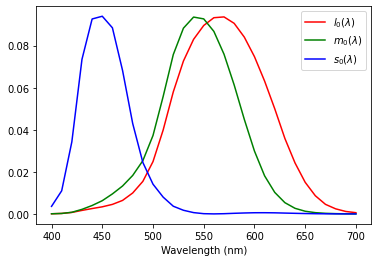

In [3]:
# apply transformation with A to find l, m, s, plot similarly
Ainv = np.array([[0.2430, 0.8560, -0.0440],
                 [-0.3910, 1.1650, 0.0870],
                 [0.0100, -0.0080, 0.5630]])
# print(data["x"])
# print(np.shape(data["x"]))
# xyz = [data["x"]; data["y"]; data["z"]]
xyz = np.vstack((data["x"], data["y"], data["z"]))
# print(xyz)
# print(np.shape(xyz))
lms = np.dot(Ainv,xyz)
l = lms[0,:]
m = lms[1,:]
s = lms[2,:]

plt.figure()
plt.plot(lam,np.transpose(l),color='red')
plt.plot(lam,np.transpose(m),color='green')
plt.plot(lam,np.transpose(s),color='blue')
plt.xlabel('Wavelength (nm)')
plt.legend(['$l_0(\lambda)$', '$m_0(\lambda)$', '$s_0(\lambda)$'])

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("lms.tif")
png1.close()

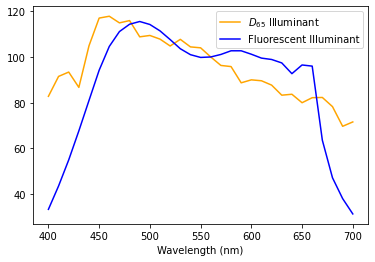

In [4]:
plt.figure()
plt.plot(lam,np.transpose(data["illum1"]),color='orange')
plt.plot(lam,np.transpose(data["illum2"]),color='blue')
plt.xlabel('Wavelength (nm)')
plt.legend(['$D_{65}$ Illuminant', 'Fluorescent Illuminant', 'z(lam)'])

png1 = io.BytesIO()
plt.savefig(png1, format="png")
img_out = Image.open(png1)
img_out.save("D65vsFlu.tif")
png1.close()